In [21]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

#Get code on how to use the key from website, usually provided, and also the API Key

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '295ae5d6-4c1c-403f-84e9-08baadf60f3a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-08-12T19:52:25.477Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9642}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10386, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [22]:
type(data)

dict

In [23]:
import pandas as pd

#This allows to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
#This normalizes the data and makes it all pretty in a dataframe
#add timestamp to know when data is collected

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\user\AppData\Local\Temp\ipykernel_3780\4213410274.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945538e+07,1.945538e+07,False,NaN,1,NaN,NaN,None,2023-08-12T19:50:00.000Z,29401.389207,6.321533e+09,-38.6639,-0.060609,0.135450,1.252095,-6.818691,13.551591,9.309549,5.720152e+11,48.7383,6.174292e+11,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201473e+08,1.201473e+08,True,NaN,2,NaN,NaN,None,2023-08-12T19:50:00.000Z,1846.684026,2.374564e+09,-28.4786,-0.078979,0.236518,0.686620,-7.321515,6.085281,2.743874,2.218740e+11,18.9053,2.218740e+11,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.341087e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.999531,1.351572e+10,-18.1395,0.010648,0.070401,0.057888,-0.111323,-0.038615,-0.092564,8.337172e+10,7.1036,8.664357e+10,None,2023-08-12T19:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-12 19:52:27.606382
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538531e+08,1.538531e+08,False,NaN,4,NaN,NaN,None,2023-08-12T19:50:00.000Z,240.590642,2.873245e+08,-24.4216,-0.049316,0.606395,-0.772145,-5.081365,0.900601,-22.753604,3.701561e+10,3.1540,3.701561e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.278728e+10,9.998852e+10,False,NaN,5,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.627676,5.113570e+08,-43.2447,-0.302598,-0.328546,0.017599,-21.993332,21.287828,47.628529,3.313330e+10,2.8231,6.276757e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382
5,3408,USD Coin,USDC,usd-coin,13584,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.613901e+10,2.613901e+10,False,NaN,6,NaN,NaN,None,2023-08-12T19:50:00.000Z,1.000077,1.720456e+09,-30.4744,0.004468,0.001595,0.006154,-0.003186,0.001389,0.011425,2.614102e+10,2.2273,2.614102e+10,None,2023-08-12T19:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-12 19:52:27.606382
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.405627e+11,1.405627e+11,True,NaN,7,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.076823,2.902667e+08,30.1266,-0.045122,2.027644,0.991441,10.162406,24.971326,7.203723,1.079840e+10,0.9201,1.079840e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.503475e+10,3.606117e+10,False,NaN,8,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.291961,1.149412e+08,-17.2154,-0.182482,-0.507650,-0.251174,-15.372979,6.256112,-20.737790,1.022878e+10,0.8715,1.313825e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN

In [25]:
#Creating function to automate API Pull

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '295ae5d6-4c1c-403f-84e9-08baadf60f3a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#Multiple Scenarios:
    
#1) Adding Timestamp orignally when manually pulling data

    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

#2) Adding Timestamp and Append Data for Automated Pull(within dataframe)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

#3) Creating a csv and append data to it(dataframe and stored in excel)

    #df = pd.json_normalize(data['data'])
    #df['Timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\user\Desktop\PortfolioProject2023\Web Scraping\AutomatedAPIPullData.csv'):
        #df.to_csv(r'C:\Users\user\Desktop\PortfolioProject2023\Web Scraping\AutomatedAPIPullData.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\user\Desktop\PortfolioProject2023\Web Scraping\AutomatedAPIPullData.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\user\Desktop\PortfolioProject2023\Web Scraping\AutomatedAPIPullData.csv')



In [26]:
#Automating Function with For Loops
#Range based on limit of how many run allowed per day by CoinMarketCap which is 333/day

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #sleep every 60 seconds or 1 minute
exit()

C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:38: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successfully


C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:38: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successfully


C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:38: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successfully


C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:38: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successfully


C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:38: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\user\AppData\Local\Temp\ipykernel_3780\1425307571.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successfully


KeyboardInterrupt: 

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945538e+07,1.945538e+07,False,NaN,1,NaN,NaN,None,2023-08-12T19:50:00.000Z,29401.389207,6.321533e+09,-38.6639,-0.060609,0.135450,1.252095,-6.818691,13.551591,9.309549,5.720152e+11,48.7383,6.174292e+11,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201473e+08,1.201473e+08,True,NaN,2,NaN,NaN,None,2023-08-12T19:50:00.000Z,1846.684026,2.374564e+09,-28.4786,-0.078979,0.236518,0.686620,-7.321515,6.085281,2.743874,2.218740e+11,18.9053,2.218740e+11,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.341087e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.999531,1.351572e+10,-18.1395,0.010648,0.070401,0.057888,-0.111323,-0.038615,-0.092564,8.337172e+10,7.1036,8.664357e+10,None,2023-08-12T19:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-12 19:52:27.606382,NaT
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538531e+08,1.538531e+08,False,NaN,4,NaN,NaN,None,2023-08-12T19:50:00.000Z,240.590642,2.873245e+08,-24.4216,-0.049316,0.606395,-0.772145,-5.081365,0.900601,-22.753604,3.701561e+10,3.1540,3.701561e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.278728e+10,9.998852e+10,False,NaN,5,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.627676,5.113570e+08,-43.2447,-0.302598,-0.328546,0.017599,-21.993332,21.287828,47.628529,3.313330e+10,2.8231,6.276757e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
5,3408,USD Coin,USDC,usd-coin,13584,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.613901e+10,2.613901e+10,False,NaN,6,NaN,NaN,None,2023-08-12T19:50:00.000Z,1.000077,1.720456e+09,-30.4744,0.004468,0.001595,0.006154,-0.003186,0.001389,0.011425,2.614102e+10,2.2273,2.614102e+10,None,2023-08-12T19:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-12 19:52:27.606382,NaT
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.405627e+11,1.405627e+11,True,NaN,7,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.076823,2.902667e+08,30.1266,-0.045122,2.027644,0.991441,10.162406,24.971326,7.203723,1.079840e+10,0.9201,1.079840e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.503475e+10,3.606117e+10,False,NaN,8,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.291961,1.149412e+08,-17.2154,-0.182482,-0.507650,-0.251174,-15.372979,6.256112,-20.737790,1.022878e+10,0.8715,1.313825e+10,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,"[pos, platfo

In [29]:
#Changing Scientific Notation 
pd.set_option('display.float_format', lambda x: '%.5f' %x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19455381.00000,19455381.00000,False,NaN,1,NaN,NaN,None,2023-08-12T19:50:00.000Z,29401.38921,6321532612.47703,-38.66390,-0.06061,0.13545,1.25209,-6.81869,13.55159,9.30955,572015228942.94360,48.73830,617429173337.79004,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120147264.77682,120147264.77682,True,NaN,2,NaN,NaN,None,2023-08-12T19:50:00.000Z,1846.68403,2374564398.21405,-28.47860,-0.07898,0.23652,0.68662,-7.32151,6.08528,2.74387,221874034686.66602,18.90530,221874034686.67001,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83410866925.61348,86684257831.22595,True,NaN,3,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.99953,13515715022.04864,-18.13950,0.01065,0.07040,0.05789,-0.11132,-0.03862,-0.09256,83371720363.32101,7.10360,86643574994.28000,None,2023-08-12T19:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-12 19:52:27.606382,NaT
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153853055.14554,153853055.14554,False,NaN,4,NaN,NaN,None,2023-08-12T19:50:00.000Z,240.59064,287324479.97276,-24.42160,-0.04932,0.60640,-0.77214,-5.08136,0.90060,-22.75360,37015605246.60378,3.15400,37015605246.60000,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52787284454.00000,99988519823.00000,False,NaN,5,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.62768,511357035.27915,-43.24470,-0.30260,-0.32855,0.01760,-21.99333,21.28783,47.62853,33133298148.48445,2.82310,62767574599.06000,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
5,3408,USD Coin,USDC,usd-coin,13584,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26139012960.46545,26139012960.46545,False,NaN,6,NaN,NaN,None,2023-08-12T19:50:00.000Z,1.00008,1720456380.04022,-30.47440,0.00447,0.00160,0.00615,-0.00319,0.00139,0.01142,26141020738.06531,2.22730,26141020738.07000,None,2023-08-12T19:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-12 19:52:27.606382,NaT
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140562706383.70523,140562706383.70523,True,NaN,7,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.07682,290266681.50710,30.12660,-0.04512,2.02764,0.99144,10.16241,24.97133,7.20372,10798404161.24689,0.92010,10798404161.25000,None,2023-08-12T19:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 19:52:27.606382,NaT
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35034753817.47800,36061170836.35500,False,NaN,8,NaN,NaN,None,2023-08-12T19:50:00.000Z,0.29196,114941164.34745,-17.21540,-0.18248,-0.50765,-0.25117,-15.37298,6.25611,-20.73779,10228782527.54100,0.87150,1313

In [30]:
#Price Changes over Time
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05162,0.12646,1.25231,-7.01689,13.56408,9.33821
Ethereum,-0.08149,0.22311,0.68378,-7.44481,6.09765,2.76126
Tether USDt,0.01357,0.07335,0.06389,-0.12292,-0.03172,-0.08703
BNB,-0.05032,0.60534,-0.77996,-5.15128,0.92067,-22.76224
XRP,-0.38321,-0.43408,-0.02404,-22.61304,21.18421,47.47891
USD Coin,0.00944,0.00620,0.00992,-0.00754,0.00932,0.02006
Dogecoin,-0.16451,1.94475,0.95749,9.96894,24.88473,7.14018
Cardano,-0.19340,-0.56178,-0.27026,-15.64416,6.18803,-20.75393
Solana,-0.06008,1.27879,9.52658,-4.71274,65.16290,18.10915


In [31]:
#Pivot Data for Better Visualization
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.05162
             quote.USD.percent_change_24h     0.12646
             quote.USD.percent_change_7d      1.25231
             quote.USD.percent_change_30d    -7.01689
             quote.USD.percent_change_60d    13.56408
             quote.USD.percent_change_90d     9.33821
Ethereum     quote.USD.percent_change_1h     -0.08149
             quote.USD.percent_change_24h     0.22311
             quote.USD.percent_change_7d      0.68378
             quote.USD.percent_change_30d    -7.44481
             quote.USD.percent_change_60d     6.09765
             quote.USD.percent_change_90d     2.76126
Tether USDt  quote.USD.percent_change_1h      0.01357
             quote.USD.percent_change_24h     0.07335
             quote.USD.percent_change_7d      0.06389
             quote.USD.percent_change_30d    -0.12292
             quote.USD.percent_change_60d    -0.03172
             quote.USD.percent_change_90

In [32]:
#The data changed from dataframe to series after pivoted
type(df4)

pandas.core.series.Series

In [46]:
#Changing back series data into dataframe
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.05162
            quote.USD.percent_change_24h   0.12646
            quote.USD.percent_change_7d    1.25231
            quote.USD.percent_change_30d  -7.01689
            quote.USD.percent_change_60d  13.56408
            quote.USD.percent_change_90d   9.33821
Ethereum    quote.USD.percent_change_1h   -0.08149
            quote.USD.percent_change_24h   0.22311
            quote.USD.percent_change_7d    0.68378
            quote.USD.percent_change_30d  -7.44481
            quote.USD.percent_change_60d   6.09765
            quote.USD.percent_change_90d   2.76126
Tether USDt quote.USD.percent_change_1h    0.01357
            quote.USD.percent_change_24h   0.07335
            quote.USD.percent_change_7d    0.06389
            quote.USD.percent_change_30d  -0.12292
            quote.USD.percent_change_60d  -0.03172
            quote.USD.percent_change_90d  -0.08703
BNB         quote.USD.percent_change_1h   -0.05032
            quote.USD.percent_change_24h   0.60534
            quote.USD.percent_change_7d   -0.77996
            quote.USD.percent_change_30d  -5.15128
            quote.USD.percent_change_60d   0.92067
            quote.USD.percent_change_90d -22.76224
XRP         quote.USD.percent_change_1h   -0.38321
            quote.USD.percent_change_24h  -0.43408
            quote.USD.percent_change_7d   -0.02404
            quote.USD.percent_change_30d -22.61304
            quote.USD.percent_change_60d  21.18421
            quote.USD.percent_change_90d  47.47891
USD Coin    quote.USD.percent_change_1h    0.00944
            quote.USD.percent_change_24h   0.00620
            quote.USD.percent_change_7d    0.00992
            quote.USD.percent_change_30d  -0.00754
            quote.USD.percent_change_60d   0.00932
            quote.USD.percent_change_90d   0.02006
Dogecoin    quote.USD.percent_change_1h   -0.16451
            quote.USD.percent_change_24h   1.94475
            quote.USD.percent_change_7d    0.95749
            quote.USD.percent_change_30d   9.96894
            quote.USD.percent_change_60d  24.88473
            quote.USD.percent_change_90d   7.14018
Cardano     quote.USD.percent_change_1h   -0.19340
            quote.USD.percent_change_24h  -0.56178
            quote.USD.percent_change_7d   -0.27026
            quote.USD.percent_change_30d -15.64416
            quote.USD.percent_change_60d   6.18803
            quote.USD.percent_change_90d -20.75393
Solana      quote.USD.percent_change_1h   -0.06008
            quote.USD.percent_change_24h   1.27879
            quote.USD.percent_change_7d    9.52658
            quote.USD.percent_change_30d  -4.71274
            quote.USD.percent_change_60d  65.16290
            quote.USD.percent_change_90d  18.10915
TRON        quote.USD.percent_change_1h   -0.01785
            quote.USD.percent_change_24h   0.41565
            quote.USD.percent_change_7d    0.19886
            quote.USD.percent_change_30d  -5.15640
            quote.USD.percent_change_60d   7.84029
            quote.USD.percent_change_90d  12.01107
Shiba Inu   quote.USD.percent_change_1h    0.39972
            quote.USD.percent_change_24h   3.41722
            quote.USD.percent_change_7d    5.79183
            quote.USD.percent_change_30d  35.92338
            quote.USD.percent_change_60d  58.81399
            quote.USD.percent_change_90d  23.01679
Polygon     quote.USD.percent_change_1h    0.03670
            quote.USD.percent_change_24h   0.22271
            quote.USD.percent_change_7d    2.17979
            quote.USD.percent_change_30d -19.29048
            quote.USD.percent_change_60d   5.40829
            quote.USD.percent_change_90d -20.55977
Litecoin    quote.USD.percent_change_1h   -0.19019
            quote.USD.percent_change_24h   0.66605
            quote.USD.percent_change_7d    0.71261
            quote.USD.percent_change_30d -18.74966
            quote.USD.percent_change_60d   7.74352
            quo

In [47]:
#Reseting Index since right now, the coin name is acting as index
#to set range, df5.count() to know how many values

index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05162
1,Bitcoin,quote.USD.percent_change_24h,0.12646
2,Bitcoin,quote.USD.percent_change_7d,1.25231
3,Bitcoin,quote.USD.percent_change_30d,-7.01689
4,Bitcoin,quote.USD.percent_change_60d,13.56408
5,Bitcoin,quote.USD.percent_change_90d,9.33821
6,Ethereum,quote.USD.percent_change_1h,-0.08149
7,Ethereum,quote.USD.percent_change_24h,0.22311
8,Ethereum,quote.USD.percent_change_7d,0.68378
9,Ethereum,quote.USD.percent_change_30d,-7.44481


In [48]:
#Rename Column
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05162
1,Bitcoin,quote.USD.percent_change_24h,0.12646
2,Bitcoin,quote.USD.percent_change_7d,1.25231
3,Bitcoin,quote.USD.percent_change_30d,-7.01689
4,Bitcoin,quote.USD.percent_change_60d,13.56408
5,Bitcoin,quote.USD.percent_change_90d,9.33821
6,Ethereum,quote.USD.percent_change_1h,-0.08149
7,Ethereum,quote.USD.percent_change_24h,0.22311
8,Ethereum,quote.USD.percent_change_7d,0.68378
9,Ethereum,quote.USD.percent_change_30d,-7.44481


In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.05162
1,Bitcoin,24h,0.12646
2,Bitcoin,7d,1.25231
3,Bitcoin,30d,-7.01689
4,Bitcoin,60d,13.56408
5,Bitcoin,90d,9.33821
6,Ethereum,1h,-0.08149
7,Ethereum,24h,0.22311
8,Ethereum,7d,0.68378
9,Ethereum,30d,-7.44481


In [53]:
#Visualization

import seaborn as sns
import matplotlib.pyplot as plt

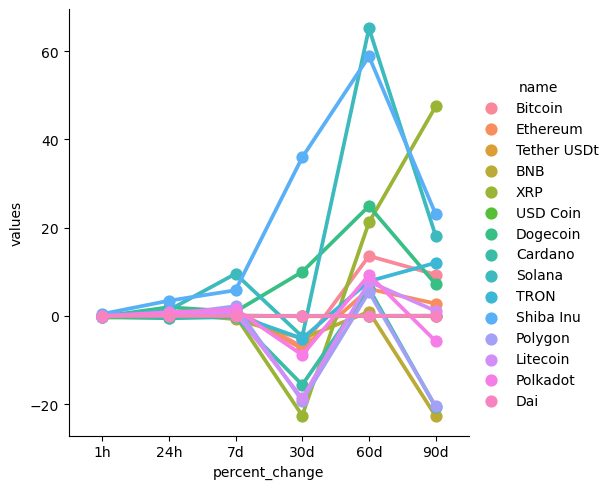

In [54]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [64]:
#Focusing on 1 coin
df8 = df[['name','quote.USD.price','Timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8 = df8.dropna(subset=['Timestamp'])
df8

,name,quote.USD.price,Timestamp
0,Bitcoin,29401.38921,2023-08-12 19:52:31.771385
0,Bitcoin,29403.31243,2023-08-12 19:53:32.245100
0,Bitcoin,29400.98547,2023-08-12 19:54:33.231459
0,Bitcoin,29401.25058,2023-08-12 19:55:34.162227
0,Bitcoin,29400.48112,2023-08-12 19:56:35.256080


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

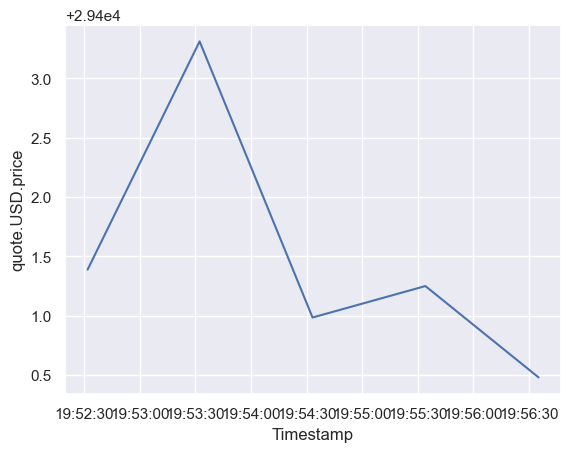

In [66]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='Timestamp',y='quote.USD.price',data = df8)